In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import random
import re
import os
import glob
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from PIL import Image
from tensorflow.keras import layers, models
from tensorflow.keras import metrics
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras import losses
from skimage.transform import resize
from keras import backend as K
from skimage.transform import resize


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    # Limita la memoria de la GPU (puedes ajustar el valor según tus necesidades)
    memory_limit = 5120  # en megabytes
    for gpu in gpus:
        tf.config.experimental.set_virtual_device_configuration(
            gpu,
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=memory_limit)])


In [2]:
#rutes
#image_dir = '/mnt/c/Users/enric/OneDrive - UAB/UNI Enric-portatil/4t/TFG/Propostes material/Fish dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat'
#mask_dir = '/mnt/c/Users/enric/OneDrive - UAB/UNI Enric-portatil/4t/TFG/Propostes material/Fish dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT'

image_dir='/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat'
mask_dir='/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT'

#image_dir='/kaggle/input/flood-area-segmentation/Image'
#mask_dir='/kaggle/input/flood-area-segmentation/Mask'
# image_dir="/home/enric/Escritorio/uni portatil/TFG/Fish dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat"
# mask_dir="/home/enric/Escritorio/uni portatil/TFG/Fish dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT"

In [3]:
os.listdir(image_dir)

['00929.png',
 '00704.png',
 '00562.png',
 '00237.png',
 '00406.png',
 '00448.png',
 '00255.png',
 '00435.png',
 '00365.png',
 '00105.png',
 '00936.png',
 '00512.png',
 '00869.png',
 '00669.png',
 '00733.png',
 '00657.png',
 '00033.png',
 '00096.png',
 '00185.png',
 '00238.png',
 '00488.png',
 '00356.png',
 '00082.png',
 '00004.png',
 '00305.png',
 '00124.png',
 '00874.png',
 '00023.png',
 '00723.png',
 '00145.png',
 '00100.png',
 '00041.png',
 '00080.png',
 '00298.png',
 '00024.png',
 '00239.png',
 '00965.png',
 '00052.png',
 '00173.png',
 '00468.png',
 '00254.png',
 '00570.png',
 '00280.png',
 '00578.png',
 '00515.png',
 '00242.png',
 '00123.png',
 '00250.png',
 '00644.png',
 '00535.png',
 '00549.png',
 '00808.png',
 '00122.png',
 '00573.png',
 '00409.png',
 '00973.png',
 '00787.png',
 '00743.png',
 '00572.png',
 '00650.png',
 '00373.png',
 '00436.png',
 '00673.png',
 '00824.png',
 '00975.png',
 '00873.png',
 '00283.png',
 '00035.png',
 '00730.png',
 '00375.png',
 '00475.png',
 '0024

In [4]:
## Retallo les imatges per a que s'adequin al tamany necessari pel model.

image_list = []
resized_images = []

directory_path = image_dir

for filename in glob.glob(os.path.join(directory_path, '*.png')):
    print(filename)
    img = Image.open(filename)
    image_list.append(img)

for image in image_list:
    image = image.resize((590,444))
    resized_images.append(image)

#output_directory = '/mnt/c/Users/enric/OneDrive - UAB/UNI Enric-portatil/4t/TFG/Propostes material/Fish dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/resized_images'
#output_directory ="/home/enric/Escritorio/uni portatil/TFG/Fish dataset/Fish_Dataset/Black Sea Sprat/resized_images"
output_directory='/kaggle/working'
for (i, new) in enumerate(resized_images):
    new.save(os.path.join(output_directory, '{}{}.png'.format('resized_image', i+1)))


/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00704.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00562.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00237.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00406.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00448.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00255.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00435.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00365.png
/kaggle/input/a-lar

In [5]:
## Retallo les mascares per a que s'adequin al tamany necessari pel model.
masks_list = []
resized_masks = []

directory_path = mask_dir

for filename in glob.glob(os.path.join(directory_path, '*.png')):
    print(filename)
    msk = Image.open(filename)
    masks_list.append(msk)

for mask in masks_list:
    mask = mask.resize((590,444))
    resized_masks.append(mask)

#output_directory = '/mnt/c/Users/enric/OneDrive - UAB/UNI Enric-portatil/4t/TFG/Propostes material/Fish dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/resized_masks'
#output_directory ="/home/enric/Escritorio/uni portatil/TFG/Fish dataset/Fish_Dataset/Black Sea Sprat/resized_masks"
output_directory='/kaggle/working'

for (i, new) in enumerate(resized_masks):
    new.save(os.path.join(output_directory, '{}{}.png'.format('resized_mask', i+1)))



/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00929.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00704.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00562.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00237.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00406.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00448.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00255.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00435.png
/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00

In [12]:
def load_images_and_masks(image_dir):
    images = []
    masks = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".png") and "image" in filename:
            # Obtinc el numero d'imatge a partir del nom
            image_number = re.search(r'\d+', filename).group()

            # Carrego la imatge
            image_path = os.path.join(image_dir, filename)
            image = np.array(Image.open(image_path))

            # Carrego la mascara corresponent
            mask_filename = f"resized_mask{image_number}.png"
            mask_path = os.path.join(image_dir, mask_filename)
            mask = np.array(Image.open(mask_path).convert("L"))
            
            #Normalitzo les mascares
            mask = mask.reshape(mask.shape[0], mask.shape[1], 1) / 255.0

            # Guardo la imatge i la mascara en un diccionari
            images.append(image)
            masks.append(mask)
                
    return np.array(images),np.array(masks)



In [4]:
# # Pels altres datasets!!

# def load_images_and_masks(image_dir,mask_dir):
#     images = []
#     masks = []
#     for filename in os.listdir(image_dir):
#         if filename.endswith(".jpg"): #and "image" in filename:
#             # Obtinc el numero d'imatge a partir del nom
#             image_number = re.search(r'\d+', filename).group()

#             # Carrego la imatge
#             image_filename=f"um_{image_number}.jpg"
#             image_path = os.path.join(image_dir, filename)
#             image = np.array(Image.open(image_path))

#             # Carrego la mascara corresponent
#             mask_filename = f"{image_number}.png"
#             mask_path = os.path.join(mask_dir, mask_filename)
#             mask = np.array(Image.open(mask_path).convert('L'))
            
#             #Normalitzo les mascares
#             mask = mask.reshape(mask.shape[0], mask.shape[1], 1) / 255.0
            
#             print(f"Image shape: {image.shape}, Mask shape: {mask.shape}")


#             # Guardo la imatge i la mascara en un diccionari
#             images.append(image)
#             masks.append(mask)
                
#     return np.array(images),np.array(masks)

In [13]:
# # Ruta de les imatges
# #image_dir = '/mnt/c/Users/enric/OneDrive - UAB/UNI Enric-portatil/4t/TFG/Propostes material/Fish dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/resized_images/'
# #image_dir = "/home/enric/Escritorio/uni portatil/TFG/Fish dataset/Fish_Dataset/Black Sea Sprat/resized_images"
image_dir='/kaggle/working'


# Carrego les imatges
images,masks = load_images_and_masks(image_dir)


In [ ]:
# def load_masks(mask_dir):
#      masks = []

#      for filename in os.listdir(mask_dir):
#          if filename.endswith(".png") and "mask" in filename:
             
#              mask_path = os.path.join(mask_dir, filename)
#              mask = np.array(Image.open(mask_path).convert("L"))
#              normalized_mask=mask/255.0
             
#              masks.append(normalized_mask)
#      return np.array(masks)



In [ ]:
# # Ruta de les mascares
# #masks_dir = '/mnt/c/Users/enric/OneDrive - UAB/UNI Enric-portatil/4t/TFG/Propostes material/Fish dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/resized_masks'
# #masks_dir = "/home/enric/Escritorio/uni portatil/TFG/Fish dataset/Fish_Dataset/Black Sea Sprat/resized_masks"
masks_dir="/kaggle/working"


# Carrego les imatges
masks = load_masks(masks_dir)

In [14]:
# #Ajusto les imatges
# #adjusted_images = images.reshape(-1, 590, 444, 3)
masks = masks.reshape(-1, masks.shape[1], masks.shape[2], 1)

In [21]:
images.shape

((1000, 444, 590, 3), (1000, 444, 590, 1))

In [16]:
masks.shape

(1000, 444, 590, 1)

In [22]:
images_reshaped = images.reshape((-1, 444, 590, 3))
masks_reshaped = masks.reshape((-1, 444, 590, 1))


In [17]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [18]:
#Model
input_shape = (444,590, 3)
num_filters = 32


## Model més simple per mirar de solventar el problema de dimensions.
model = models.Sequential()
    
# Encoder
model.add(layers.Conv2D(num_filters, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

    
# Decoder
model.add(layers.Conv2D(num_filters, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef]) #dice coefficient

In [ ]:
# #### PROVA MODEL MÉS COMPLEX
# input_shape = (444, 590, 3)
# num_filters = 32

# model = models.Sequential()

# # Encoder
# model.add(layers.Conv2D(num_filters, (3, 3), activation='relu', padding='same', input_shape=input_shape))
# model.add(BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Additional Encoder Layers
# model.add(layers.Conv2D(2*num_filters, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(layers.Activation('relu'))
# #model.add(layers.MaxPooling2D((2, 2)))

# # Decoder
# model.add(layers.Conv2D(2*num_filters, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(layers.Activation('relu'))
# #model.add(layers.UpSampling2D((2, 2)))

# # Additional Decoder Layers
# model.add(layers.Conv2DTranspose(num_filters, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.UpSampling2D((2, 2)))

# model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef])


In [23]:
# Train the model
model.fit(images_reshaped, masks_reshaped, epochs=10, batch_size=8)


Epoch 1/10
125/125 [==============================] - 11s 84ms/step - loss: 0.0439 - dice_coef: 0.8890
Epoch 2/10
125/125 [==============================] - 11s 84ms/step - loss: 0.0430 - dice_coef: 0.8896
Epoch 3/10
125/125 [==============================] - 11s 85ms/step - loss: 0.0429 - dice_coef: 0.8914
Epoch 4/10
125/125 [==============================] - 11s 85ms/step - loss: 0.0430 - dice_coef: 0.8903
Epoch 5/10
125/125 [==============================] - 11s 85ms/step - loss: 0.0428 - dice_coef: 0.8926
Epoch 6/10
125/125 [==============================] - 11s 85ms/step - loss: 0.0416 - dice_coef: 0.8934
Epoch 7/10
125/125 [==============================] - 11s 84ms/step - loss: 0.0415 - dice_coef: 0.8945
Epoch 8/10
125/125 [==============================] - 10s 84ms/step - loss: 0.0430 - dice_coef: 0.8898
Epoch 9/10
125/125 [==============================] - 11s 84ms/step - loss: 0.0423 - dice_coef: 0.8945
Epoch 10/10
125/125 [==============================] - 11s 84ms/step - lo

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 444, 590, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 444, 590, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 444, 590, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 222, 295, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 295, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 222, 295, 32)      1

1/1 [==============================] - 1s 590ms/step


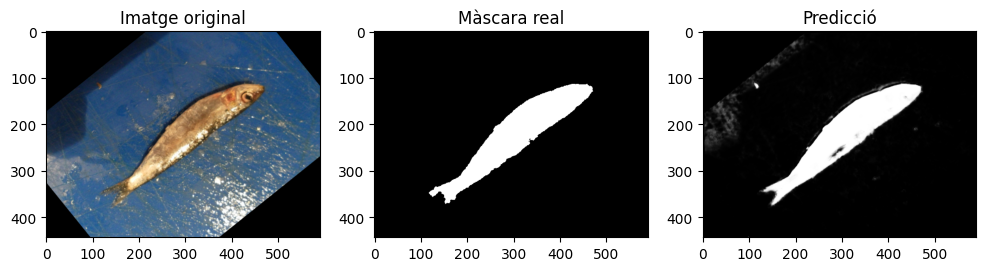

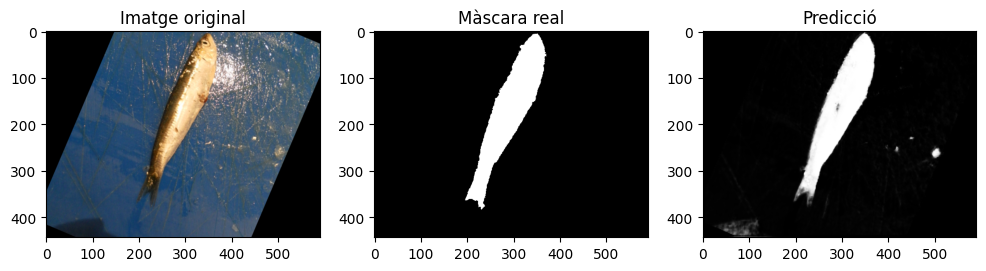

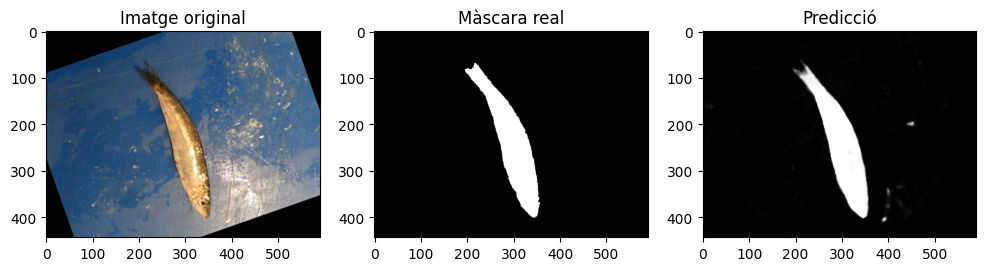

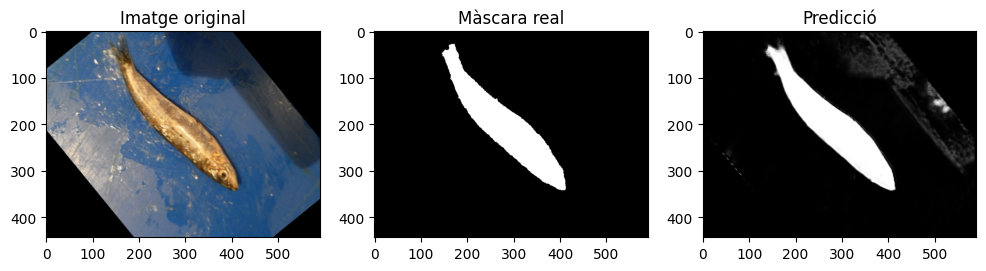

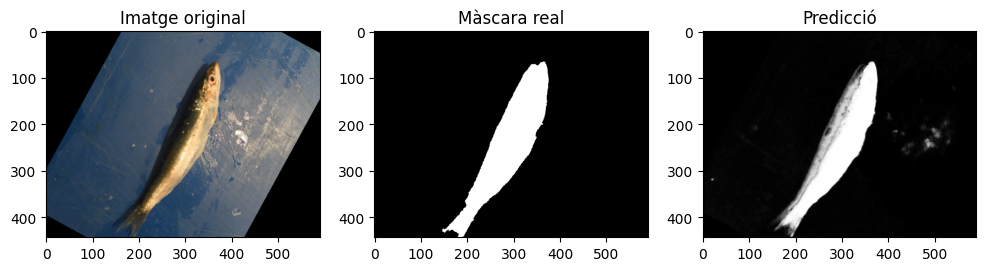

In [25]:
#comprovo com funciona el model
num_samples = 5
sample_indices = random.sample(range(len(images)), num_samples)
sample_images = [images[i] for i in sample_indices]
sample_masks_true = [masks[i] for i in sample_indices]


sample_masks_pred = model.predict(np.array(sample_images))


for i in range(num_samples):
    plt.figure(figsize=(12, 4))

    
    plt.subplot(1, 3, 1)
    plt.imshow(sample_images[i])
    plt.title('Imatge original')

   
    plt.subplot(1, 3, 2)
    plt.imshow(sample_masks_true[i][:, :, 0], cmap='gray')  
    plt.title('Màscara real')

    
    plt.subplot(1, 3, 3)
    plt.imshow(sample_masks_pred[i][:, :, 0], cmap='gray')  
    plt.title('Predicció')

    plt.show()
#component connexa

#200x200

In [ ]:
# SAM

In [2]:
import os 
import numpy as np
import pandas as pd

HOME = os.getcwd()
print("HOME:", HOME)

%cd {HOME}

!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q supervision

HOME: /kaggle/working
/kaggle/working
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-50z26_uz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-50z26_uz
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [3]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/kaggle/working
/kaggle/working/weights
/kaggle/working/weights/sam_vit_h_4b8939.pth ; exist: True


In [4]:
# Carrego imatges de prova:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

/kaggle/working
/kaggle/working/data


In [11]:
import torch
import matplotlib.pyplot as plt
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)


In [7]:
mask_generator = SamAutomaticMaskGenerator(sam)

IMAGE_NAME = "dog.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [14]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

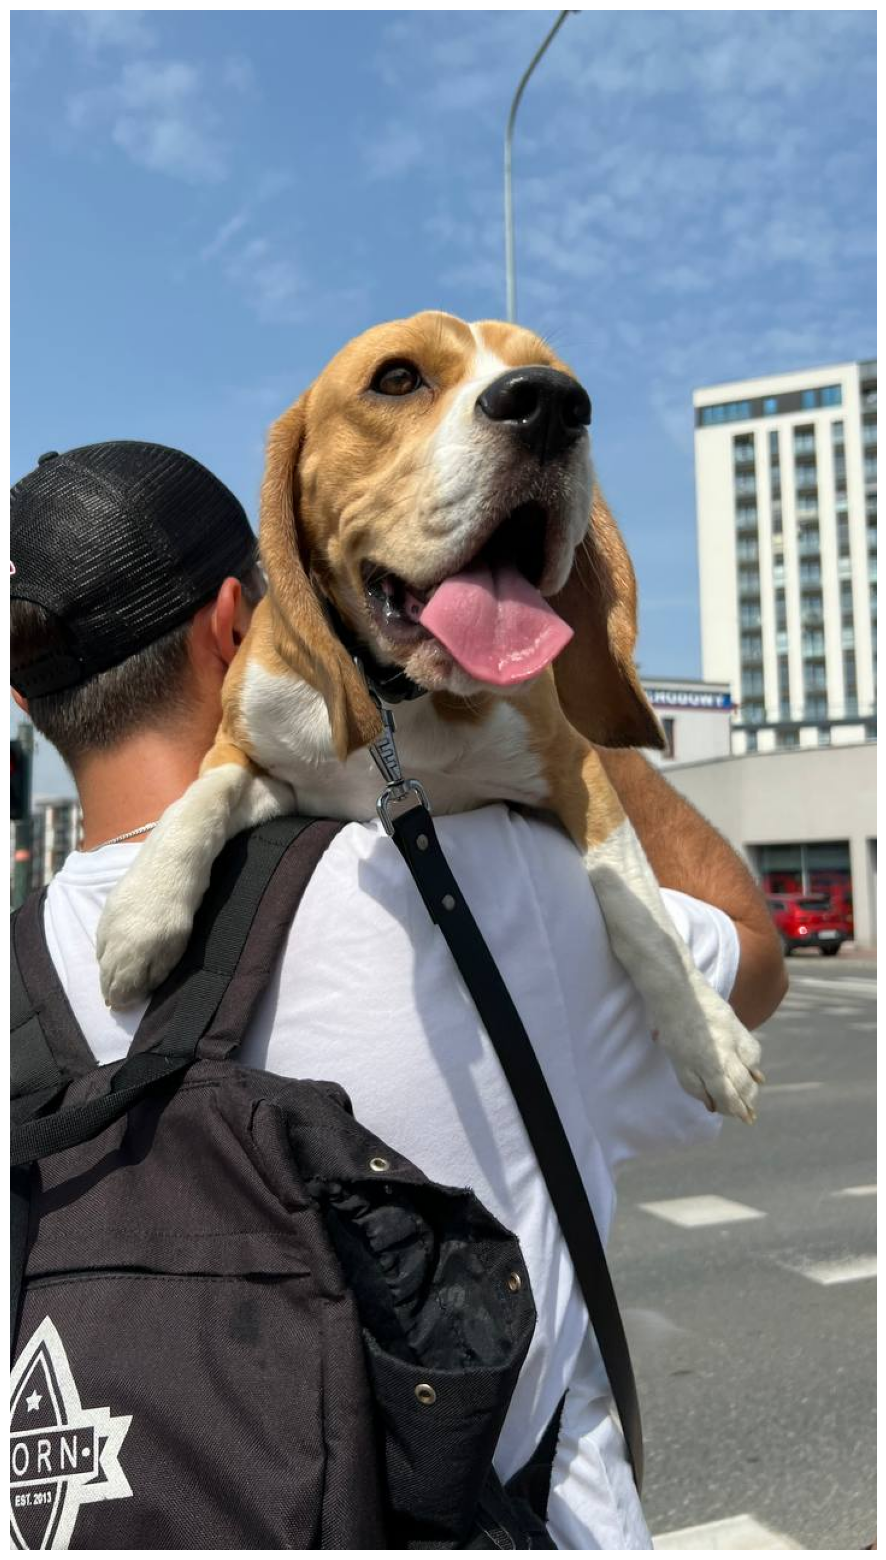

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(image_rgb)
plt.axis('off')
plt.show() 

In [18]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/kaggle/working/weights/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [20]:
masks = mask_generator.generate(image_rgb)

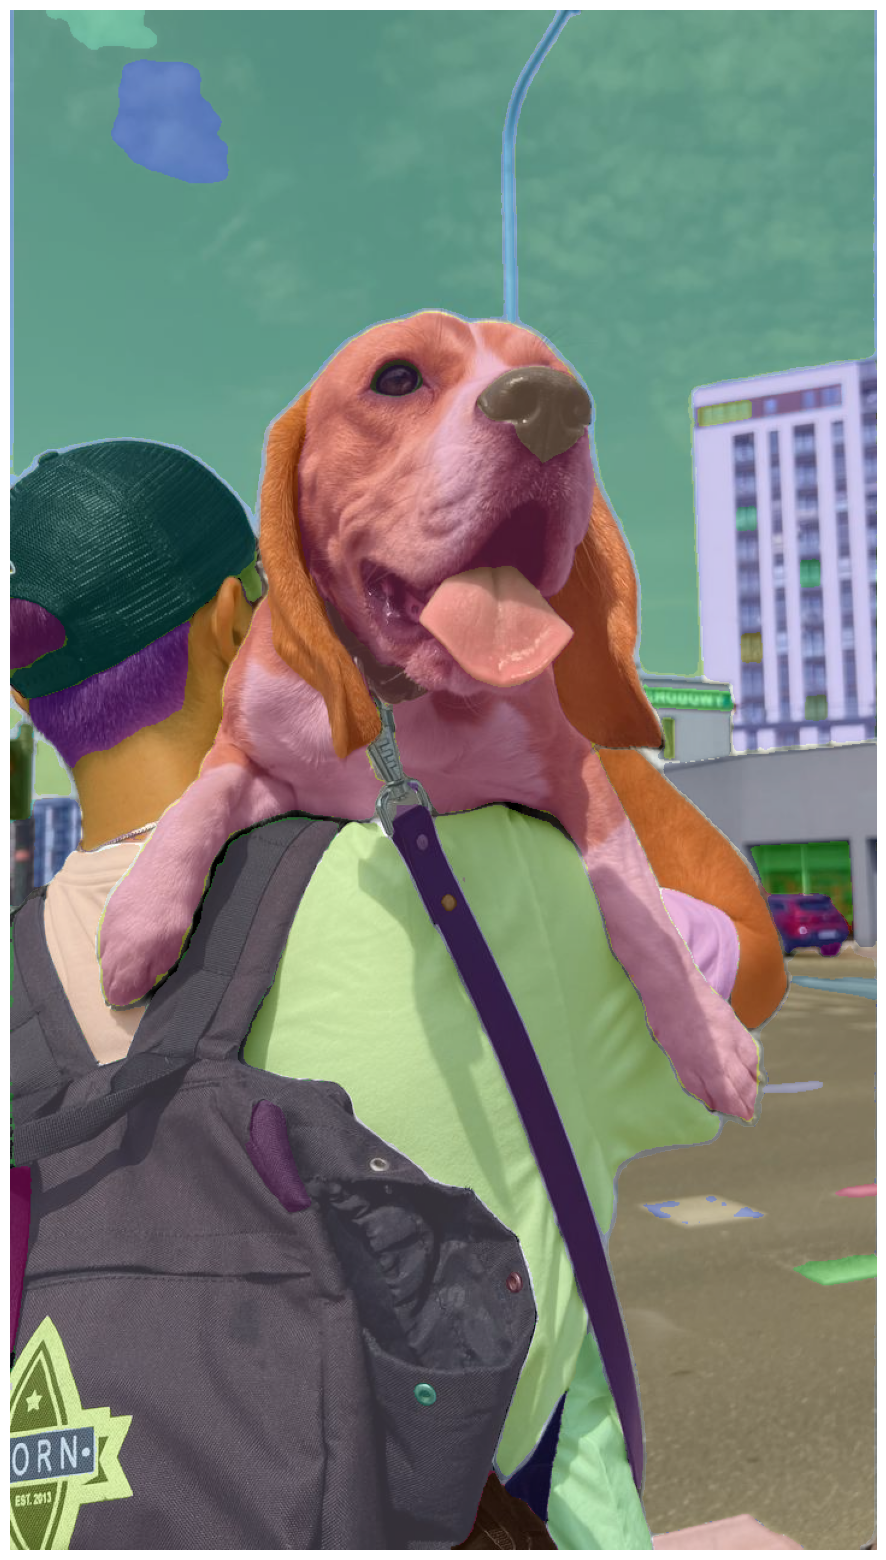

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(image_rgb)
show_anns(masks)
plt.axis('off')
plt.show() 

In [ ]:
###### PROVES VARIES###########

In [ ]:
image = np.array(Image.open("/kaggle/working/resized_mask722.png"))
image.max()
plt.imshow(image,cmap="gray")

In [ ]:

def load_images(image_dir):
    images = {}
    for filename in os.listdir(image_dir):
        if filename.endswith(".png") and "image" in filename:
            image_path = os.path.join(image_dir, filename)
            image = np.array(Image.open(image_path).convert("RGB"))
            normalized_image = image / 255.0
            image_key = filename.replace("_image.png", "")
            images[image_key] = {'image': normalized_image}

    return images

def load_masks(mask_dir):
    masks = {}
    for filename in os.listdir(mask_dir):
        if filename.endswith(".png") and "mask" in filename:
            mask_path = os.path.join(mask_dir, filename)
            mask = np.array(Image.open(mask_path).convert("L"))
            normalized_mask = mask / 255.0
            mask_key = filename.replace("_mask.png", "")
            masks[mask_key] = {'mask': normalized_mask}

    return masks

In [ ]:
# Buscar dataset més complex per entrenar ambdos arquitectures.
# Buscar com executar el sam en local i comprar models.